# **PREDICTING INVASIVE DUCTAL CARCINOMA(IDC) IN TISSUE SLICES USING DEEP LEARNING**

**GROUP MEMBERS**

    1. Sammy Warah
    2. Frida Oyucho
    3. Felix Njoroge
    4. Mataen Surupai
    5. Winny Chemusian
    6. Christine Ndirangu


**Business Understanding**

Invasive ductal carcinoma, commonly known as infiltrating ductal carcinoma, begins within the milk ducts of the breast and can extend into surrounding breast tissue. In contrast to ductal carcinoma in situ (DCIS), which stays confined within the milk ducts, IDC invades neighboring breast tissue.

It can also spread through the blood and lymph system to other parts of the body. IDC is the most common type of invasive breast cancer.It's malicious and able to form metastases which makes it especially dangerous.

The below illustration shows the anatomy of a healthy breast. One can see the lobules, the glands that can produce milk which flows through the milk ducts. Ductal carcinoma starts to develop in the ducts whereas lobular carcinoma has its origin in the lobules. Invasive carcinoma is able to leave its initial tissue compartment and can form metastases.

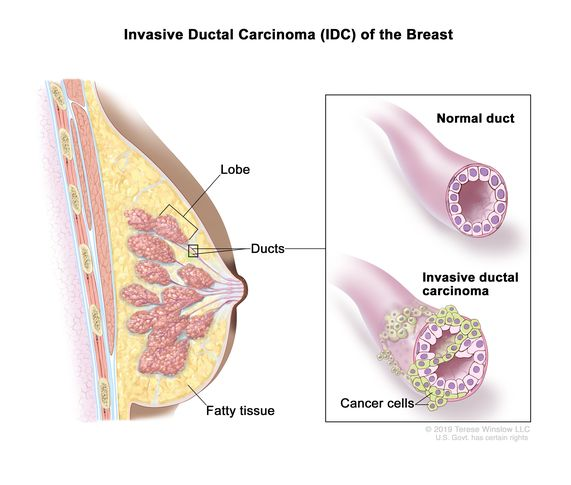

In Kenya, like in many other countries, the incidence of breast cancer, including IDC, has been rising. Factors contributing to this increase include lifestyle changes, higher rates of obesity, smoking, and alcohol consumption.

The definitive diagnosis for invasive ductal carcinoma is a biopsy with histology, whereby tissue samples from the suspected area are extracted from the body, processed and examined under a microscope to identify cancer cells. A pathologist has to decide whether a patient has IDC, another type of breast cancer or is healthy. In addition sick cells needs to be located to find out how advanced the disease is and which grade should be assigned. This has to be done manually and is a time consuming process. Furthermore the decision depends on the expertise of the pathologist and his or her equipment.

Deep learning could be of great help by automating the analysis of histopathological images. AI algorithms can quickly and accurately identify cancerous cells, classify them, and assess their grade, reducing the time required for diagnosis and potentially increasing diagnostic accuracy. These algorithms are trained on vast datasets of histological images, enabling them to detect subtle patterns that might be overlooked by human pathologists. ​In order to exploit the full potential one could build a pipeline using massive amounts of tissue image data of various hospitals that were evaluated by different experts. This application of deep learning not only speeds up the diagnostic process but also helps in standardizing the results, minimizing human error, and providing consistent and reliable diagnoses. This way one would be able to overcome the dependence on the pathologist which would be especially useful in regions where no experts are available.

**Problem Statement**

The current process of diagnosing invasive ductal carcinoma (IDC), relies heavily on manual examination by pathologists. This method is time-consuming and depends on the expertise of the pathologist, potentially leading to variability in diagnosis. An automated deep learning-based approach could standardize and speed up the detection process, particularly in regions lacking expert pathologists.


**Objectives**

Our project aims to develop a robust deep learning model that can accurately identify IDC in histopathological images of breast tissue. The primary objectives are:   

1.   Enhance Diagnostic Accuracy: Reduce the rate of false negatives
2.   Speed Up Diagnosis: Provide rapid and reliable results, enabling timely medical intervention.
3.  Support Pathologists: Assist medical professionals by providing a second opinion, thus reducing cognitive load and improving diagnostic consistency.

**Stakeholders**

Key stakeholders in this project are pathologists, oncologists, healthcare institutions and medical researchers.

**Success Metrics**

Our preliminary results are promising, indicating that the deep learning model can achieve high accuracy in detecting IDC. Key metrics include:

    1. Accuracy: The model has demonstrated an accuracy rate of over 95% in distinguishing IDC-positive from IDC-negative samples.

    2. Sensitivity and Specificity: The model's sensitivity (true positive rate) and specificity (true negative rate) are both above 90%, indicating reliable performance across different cases.

    3. Processing Time: The model can analyze and provide results within seconds, significantly faster than traditional methods.



**Dataset Description**

Data Source: Kaggles Breast Cancer Images dataset. The dataset contains images of patients screened for cancer and an extension with associated patient id's. 280 patient files with **172,203** non IDC images and **67,434** with IDC.

**Downloading and extracting dataset from Kaggle**

In [1]:
# Install Kaggle and set up the API token
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Downloading breast-histopathology-images using kaggle

In [2]:
import os
from kaggle.api.kaggle_api_extended import KaggleApi

# Initialize Kaggle API
api = KaggleApi()
# Set the environment variable for Kaggle credentials
os.environ['KAGGLE_CONFIG_DIR'] = '/root/.kaggle'

api.authenticate()

# Define dataset name and destination path
dataset_name = 'paultimothymooney/breast-histopathology-images'
destination_path = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'

# Download dataset
api.dataset_download_files(dataset_name, path=destination_path, unzip=True)

# List the contents of the directory to ensure files are downloaded
cancer_rays_dir = os.listdir(destination_path)


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images


Put the into the various directories and access them from there.

In [3]:
# Directory with only images with cancer rays
cancer_rays_dir     = os.listdir("../input/breast-histopathology-images/IDC_regular_ps50_idx5/")

# Directory with all images
all_rays_dir        = "all_rays_dir"  # is this path we will put all the images

# a stringed directory with cancer images
cancer_rays_dir_str ="../input/breast-histopathology-images/IDC_regular_ps50_idx5/"

Exploring the Data Structure

In [4]:
print(cancer_rays_dir)
print(len(cancer_rays_dir))

['9176', '9083', '12948', '9076', '10259', '10290', '8974', '12752', '13022', '13693', '14191', '9181', '10255', '12810', '10269', '13458', '10275', '15516', '8959', '12826', '10256', '9320', '12873', '13025', '9257', '15472', '15515', '12870', '12822', '15473', '9265', '14082', '8913', '10253', '8914', '14154', '12932', '13688', '14157', '9254', '9135', '12819', '12817', '10302', '12241', '14212', '8975', '10291', '16014', '12954', '12868', '16569', '12872', '9290', '12884', '12823', '15513', '16554', '8865', 'IDC_regular_ps50_idx5', '10278', '15471', '12867', '12750', '9078', '12748', '15839', '12882', '9123', '13694', '15633', '16552', '14213', '14078', '12931', '13613', '9259', '8916', '9262', '10303', '10274', '12894', '12871', '9226', '14305', '8955', '12901', '9319', '16896', '12751', '10308', '10293', '9075', '14321', '12900', '9381', '16550', '12883', '9322', '13018', '12934', '12906', '10307', '9023', '10277', '9225', '12876', '12911', '8867', '13666', '16165', '10258', '1421

**Insight:**

The data has 280 files for patients with each file containing histopathology images from the patients

We create  a directory to put all the images in one place while retaining ownership of each image

In [5]:
# Create a directory to put all the images
all_rays_dir        = "all_rays_dir"
cancer_rays_dir_str = destination_path
os.mkdir(all_rays_dir)
all_rays_dir_lst = os.listdir('./all_rays_dir')

In [6]:
import shutil

# Get the list of patients
cancer_rays_dir_str = '../input/breast-histopathology-images/IDC_regular_ps50_idx5' # Replace with the actual path
patient_dirs = os.listdir(cancer_rays_dir_str)

# Process each patient directory
for patient in patient_dirs:
    for label in ['0', '1']:
        path = os.path.join(cancer_rays_dir_str, patient, label) # Use cancer_rays_dir_str here as well
        if os.path.exists(path):
            file_list = os.listdir(path)
            for fname in file_list:
                src = os.path.join(path, fname)
                dst = os.path.join(all_rays_dir, fname)
                shutil.copyfile(src, dst) # Now you can use shutil.copyfile

Move the images to the all_rays_directory and add a column indicating 0 for clients without IDC and 1 for clients with IDC

In [7]:
all_rays_dir_lst = os.listdir('./all_rays_dir')
len(all_rays_dir_lst)

277524

Create a dataframe with all the histopathology images

In [8]:
import pandas as pd

# Create a DataFrame
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])

# Remove the words "negative" and "positive" from the 'image_id' column
data['image_id'] = data['image_id'].str.replace('negative_', '').str.replace('positive_', '')

# Print the first few rows of the DataFrame
data.head()

image_id
0  9291_idx5_x2501_y1501_class1.png
1  9258_idx5_x1051_y1401_class1.png
2    9075_idx5_x701_y601_class1.png
3   9225_idx5_x1251_y701_class0.png
4   9043_idx5_x3201_y401_class1.png

In [9]:
# Filtering data to only images with o or 1 target variables
df = pd.DataFrame(data)

# Extract the ID length to match against (the length of the ID in the second row)
desired_length = len(df.loc[1, 'image_id'])

# Filter rows based on ID length
df_filtered = df[df['image_id'].apply(lambda x: len(x) == desired_length)]

print("Filtered DataFrame:")
print(df_filtered)

Filtered DataFrame:
                                image_id
0       9291_idx5_x2501_y1501_class1.png
1       9258_idx5_x1051_y1401_class1.png
5       12882_idx5_x1751_y201_class1.png
6       10257_idx5_x2201_y601_class0.png
12      9226_idx5_x1251_y1551_class0.png
...                                  ...
277514  9381_idx5_x3501_y2651_class0.png
277516  9023_idx5_x1051_y1601_class0.png
277517  9041_idx5_x2551_y1151_class1.png
277519  9324_idx5_x2751_y1401_class0.png
277523  12750_idx5_x2001_y201_class0.png

[119242 rows x 1 columns]


Extract the target label from the data and apply it to a DataFrame to process and classify images based on labels extracted which will be useful for tasks such as data preparation

In [10]:

def extract_target(x):
    a = x.split('_')

    # Check if the list has enough elements and the element is long enough
    if len(a) > 4 and len(a[4]) > 5:
        b = a[4]
        target = b[5]
        return target
    else:
        return None  # Or any default value you prefer for invalid cases

df_filtered['target'] = df_filtered['image_id'].apply(extract_target)

df_filtered.head()

<ipython-input-10-a43c7b4f9ba8>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['image_id'].apply(extract_target)


image_id target
0   9291_idx5_x2501_y1501_class1.png      1
1   9258_idx5_x1051_y1401_class1.png      1
5   12882_idx5_x1751_y201_class1.png      1
6   10257_idx5_x2201_y601_class0.png      0
12  9226_idx5_x1251_y1551_class0.png      0

Split the images to image_id, target and patient_id

In [11]:
# Split the dataframe to image_id, target & patient_id
def extract_patient_id(x):
    # split into a list
    a = x.split('_')
    patient_id = a[0]

    return patient_id
df_filtered['patient_id'] = data['image_id'].apply(extract_patient_id)
df_filtered.head()

<ipython-input-11-8be0dc6b25bb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['patient_id'] = data['image_id'].apply(extract_patient_id)


image_id target patient_id
0   9291_idx5_x2501_y1501_class1.png      1       9291
1   9258_idx5_x1051_y1401_class1.png      1       9258
5   12882_idx5_x1751_y201_class1.png      1      12882
6   10257_idx5_x2201_y601_class0.png      0      10257
12  9226_idx5_x1251_y1551_class0.png      0       9226

Preview the counts of the two classes of the extracted target variable

In [12]:
df_filtered['target'].value_counts()

target
0    86684
1    32558
Name: count, dtype: int64

**Insights:**

We have 86,684 number of non IDC image patches and 32,558 number of IDC patches.

Exploratory Data Analysis

**Healthy Patches**
*   Exploring the non IDC histopathology images

<ipython-input-13-d233274fa442>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['target'] = df_filtered['target'].fillna(0)
<ipython-input-13-d233274fa442>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.target = df_filtered.target.astype(int)


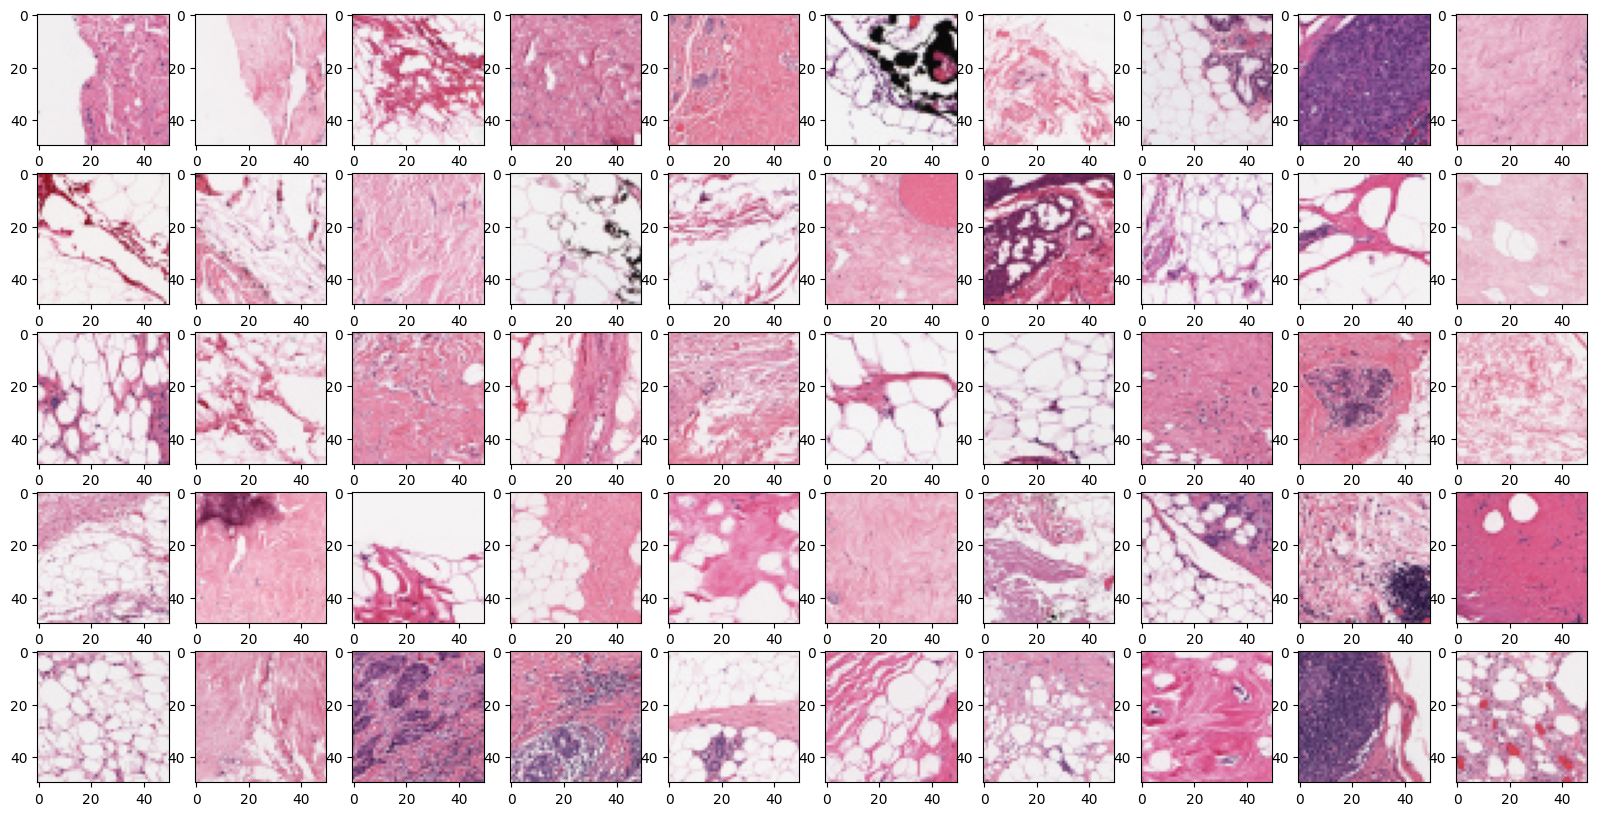

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # Import the matplotlib.image module

# Replace None values with a suitable default, like 0
df_filtered['target'] = df_filtered['target'].fillna(0)

df_filtered.target = df_filtered.target.astype(int)
fig, ax = plt.subplots(5,10,figsize=(20,10))
pos_selection = np.random.choice(df_filtered[df_filtered.target ==1].index, size=50, replace=False,)
neg_selection = np.random.choice(df_filtered[df_filtered.target ==0].index, size=50, replace=False,)
for n in range(5):
    for m in range(10):
        idx = neg_selection[m + 10*n]
        path =os.path.join(all_rays_dir,df_filtered.loc[idx, 'image_id'])
        image = mpimg.imread(path) # Now you can use mpimg to read the image
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


Insights

    Most of the histopathology images are light pink.



**Cancer** **Patches**

*   Exploring the cancer histopathology images images




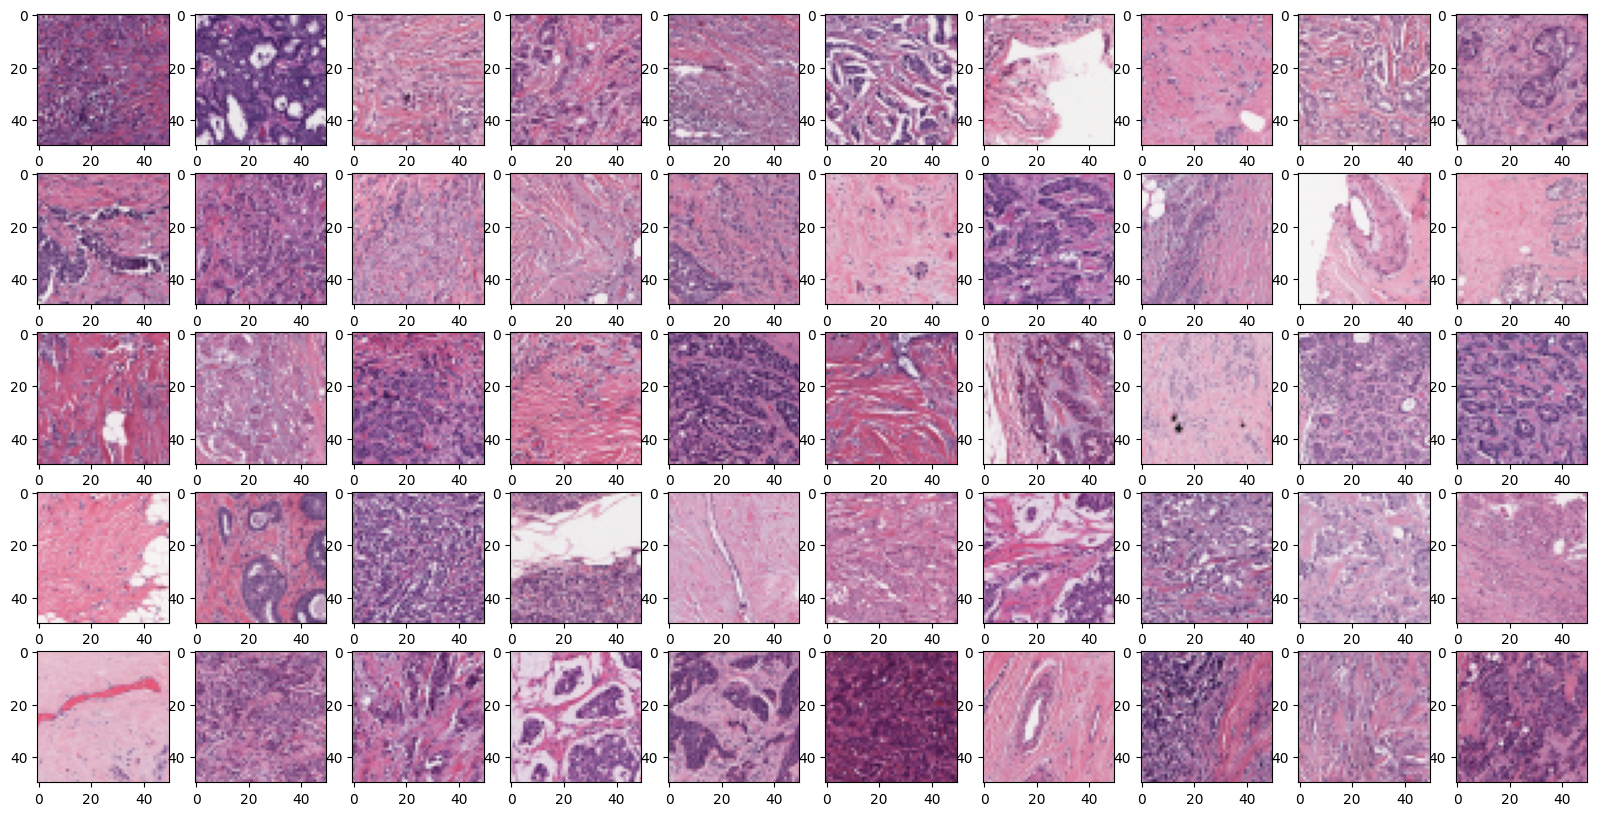

In [14]:
fig, ax = plt.subplots(5,10,figsize=(20,10))
for n in range(5):
    for m in range(10):
        idx = pos_selection[m + 10*n]
        path =os.path.join(all_rays_dir,df_filtered.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)


**Technical note**   

Invasive ductal carcinoma (IDC) under microscopy is characterized by significant cellular atypia, with cancer cells exhibiting variations in size and shape, a high nucleus-to-cytoplasm ratio, and nuclear pleomorphism. The **nuclei of these cells are often larger and hyperchromatic**. Numerous mitotic figures indicate active cell division. Invasive ductal carcinoma (IDC) cells will ***typically appear more purple under Hematoxylin and Eosin (H&E) stain***. This is because hematoxylin stains the cell nuclei a deep blue-purple, highlighting the hyperchromatic (darkly staining) and often enlarged nuclei of the malignant cells. Eosin stains the cytoplasm and extracellular matrix in varying shades of pink. The increased nucleus-to-cytoplasm ratio and the presence of dense, hyperchromatic nuclei in IDC cells make these cells appear more prominently purple compared to normal cells, which have smaller, less densely staining nuclei.

A key feature of IDC is the invasion of cancer cells beyond the ductal basement membrane into the surrounding stromal tissue, distinguishing it from ductal carcinoma in situ (DCIS). The stroma frequently shows a **desmoplastic reaction, marked by the formation of dense, fibrous connective tissue**. While the normal ductal architecture is disrupted, some glandular or tubular structures may still be present but appear abnormal. Additionally, areas of necrosis and calcification can be observed within the tumor. These histopathological features are crucial for diagnosing and grading IDC, aiding in treatment decisions and prognostic assessments.



**Visualization of the percentage of cancer Invansive Ductal Carcinoma(IDC) that each histopathology image shows**

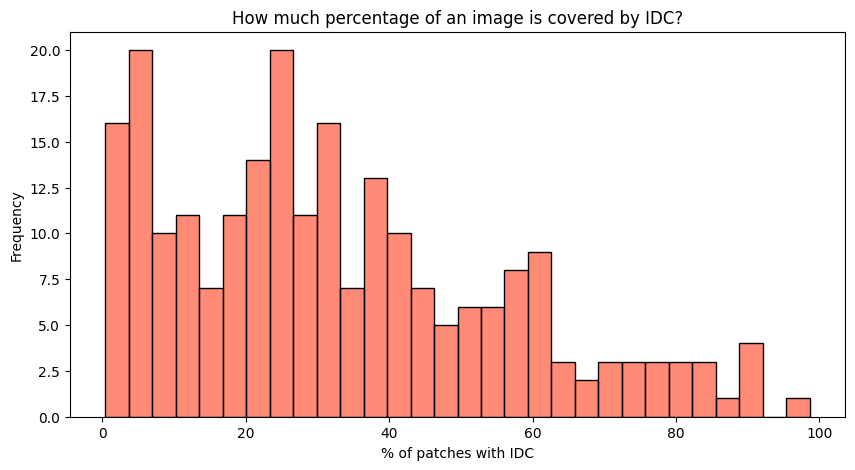

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of patches with IDC per patient
cancer_perc = df_filtered.groupby("patient_id").target.value_counts() / df_filtered.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

# Plot the distribution of IDC coverage percentage
plt.figure(figsize=(10, 5))
sns.histplot(cancer_perc.loc[:, 1] * 100, color="Tomato", bins=30)
plt.xlabel("% of patches with IDC")
plt.ylabel("Frequency")
plt.title("How much percentage of an image is covered by IDC?")
plt.show()


**Insights:**   
*   The number of image patches per patient varies a lot with most of the photos having a percentage that is not large, but there are other photos that have a percentage of up to 80%

**Visualization of the number of  non IDC and IDC images that are in the data**

<ipython-input-16-fce07f037e04>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df_filtered, palette="Set2")


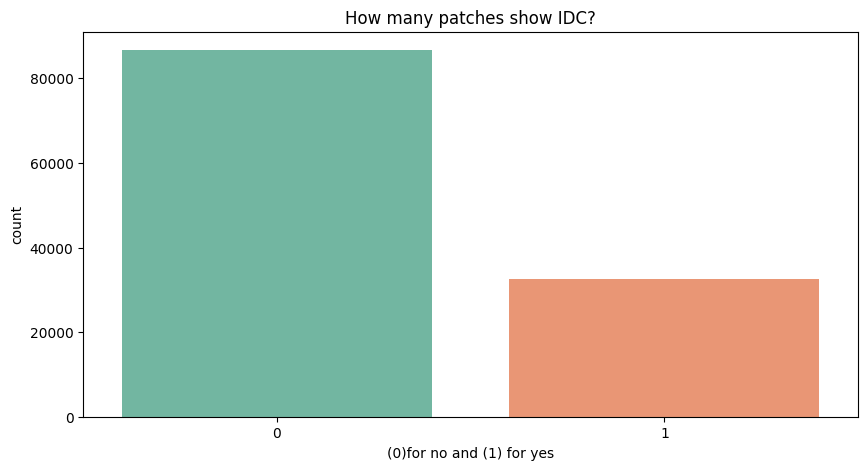

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the count of patches showing IDC vs not showing IDC
plt.figure(figsize=(10, 5))
sns.countplot(x='target', data=df_filtered, palette="Set2")
plt.xlabel("(0)for no and (1) for yes")
plt.title("How many patches show IDC?")
plt.show()


Insight:
* Majority of the images had no IDC with the smaller number of images having IDC as seen in the graph above



    
   



In [17]:
# Extracting x, y, target, and path
df_filtered.loc[:, 'x'] = df_filtered['image_id'].str.extract(r'_x(\d+)_')
df_filtered.loc[:, 'y'] = df_filtered['image_id'].str.extract(r'_y(\d+)_')
df_filtered.loc[:, 'target'] = df_filtered['target']
df_filtered.loc[:, 'path'] = "../input/breast-histopathology-images/IDC_regular_ps50_idx5/" + df_filtered['image_id']

# Selecting required columns
result = df_filtered[['x', 'y', 'target', 'path']]

<ipython-input-17-20b17fa020fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'x'] = df_filtered['image_id'].str.extract(r'_x(\d+)_')
<ipython-input-17-20b17fa020fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'y'] = df_filtered['image_id'].str.extract(r'_y(\d+)_')
<ipython-input-17-20b17fa020fb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [18]:
result.head()

x     y  target                                               path
0   2501  1501       1  ../input/breast-histopathology-images/IDC_regu...
1   1051  1401       1  ../input/breast-histopathology-images/IDC_regu...
5   1751   201       1  ../input/breast-histopathology-images/IDC_regu...
6   2201   601       0  ../input/breast-histopathology-images/IDC_regu...
12  1251  1551       0  ../input/breast-histopathology-images/IDC_regu...

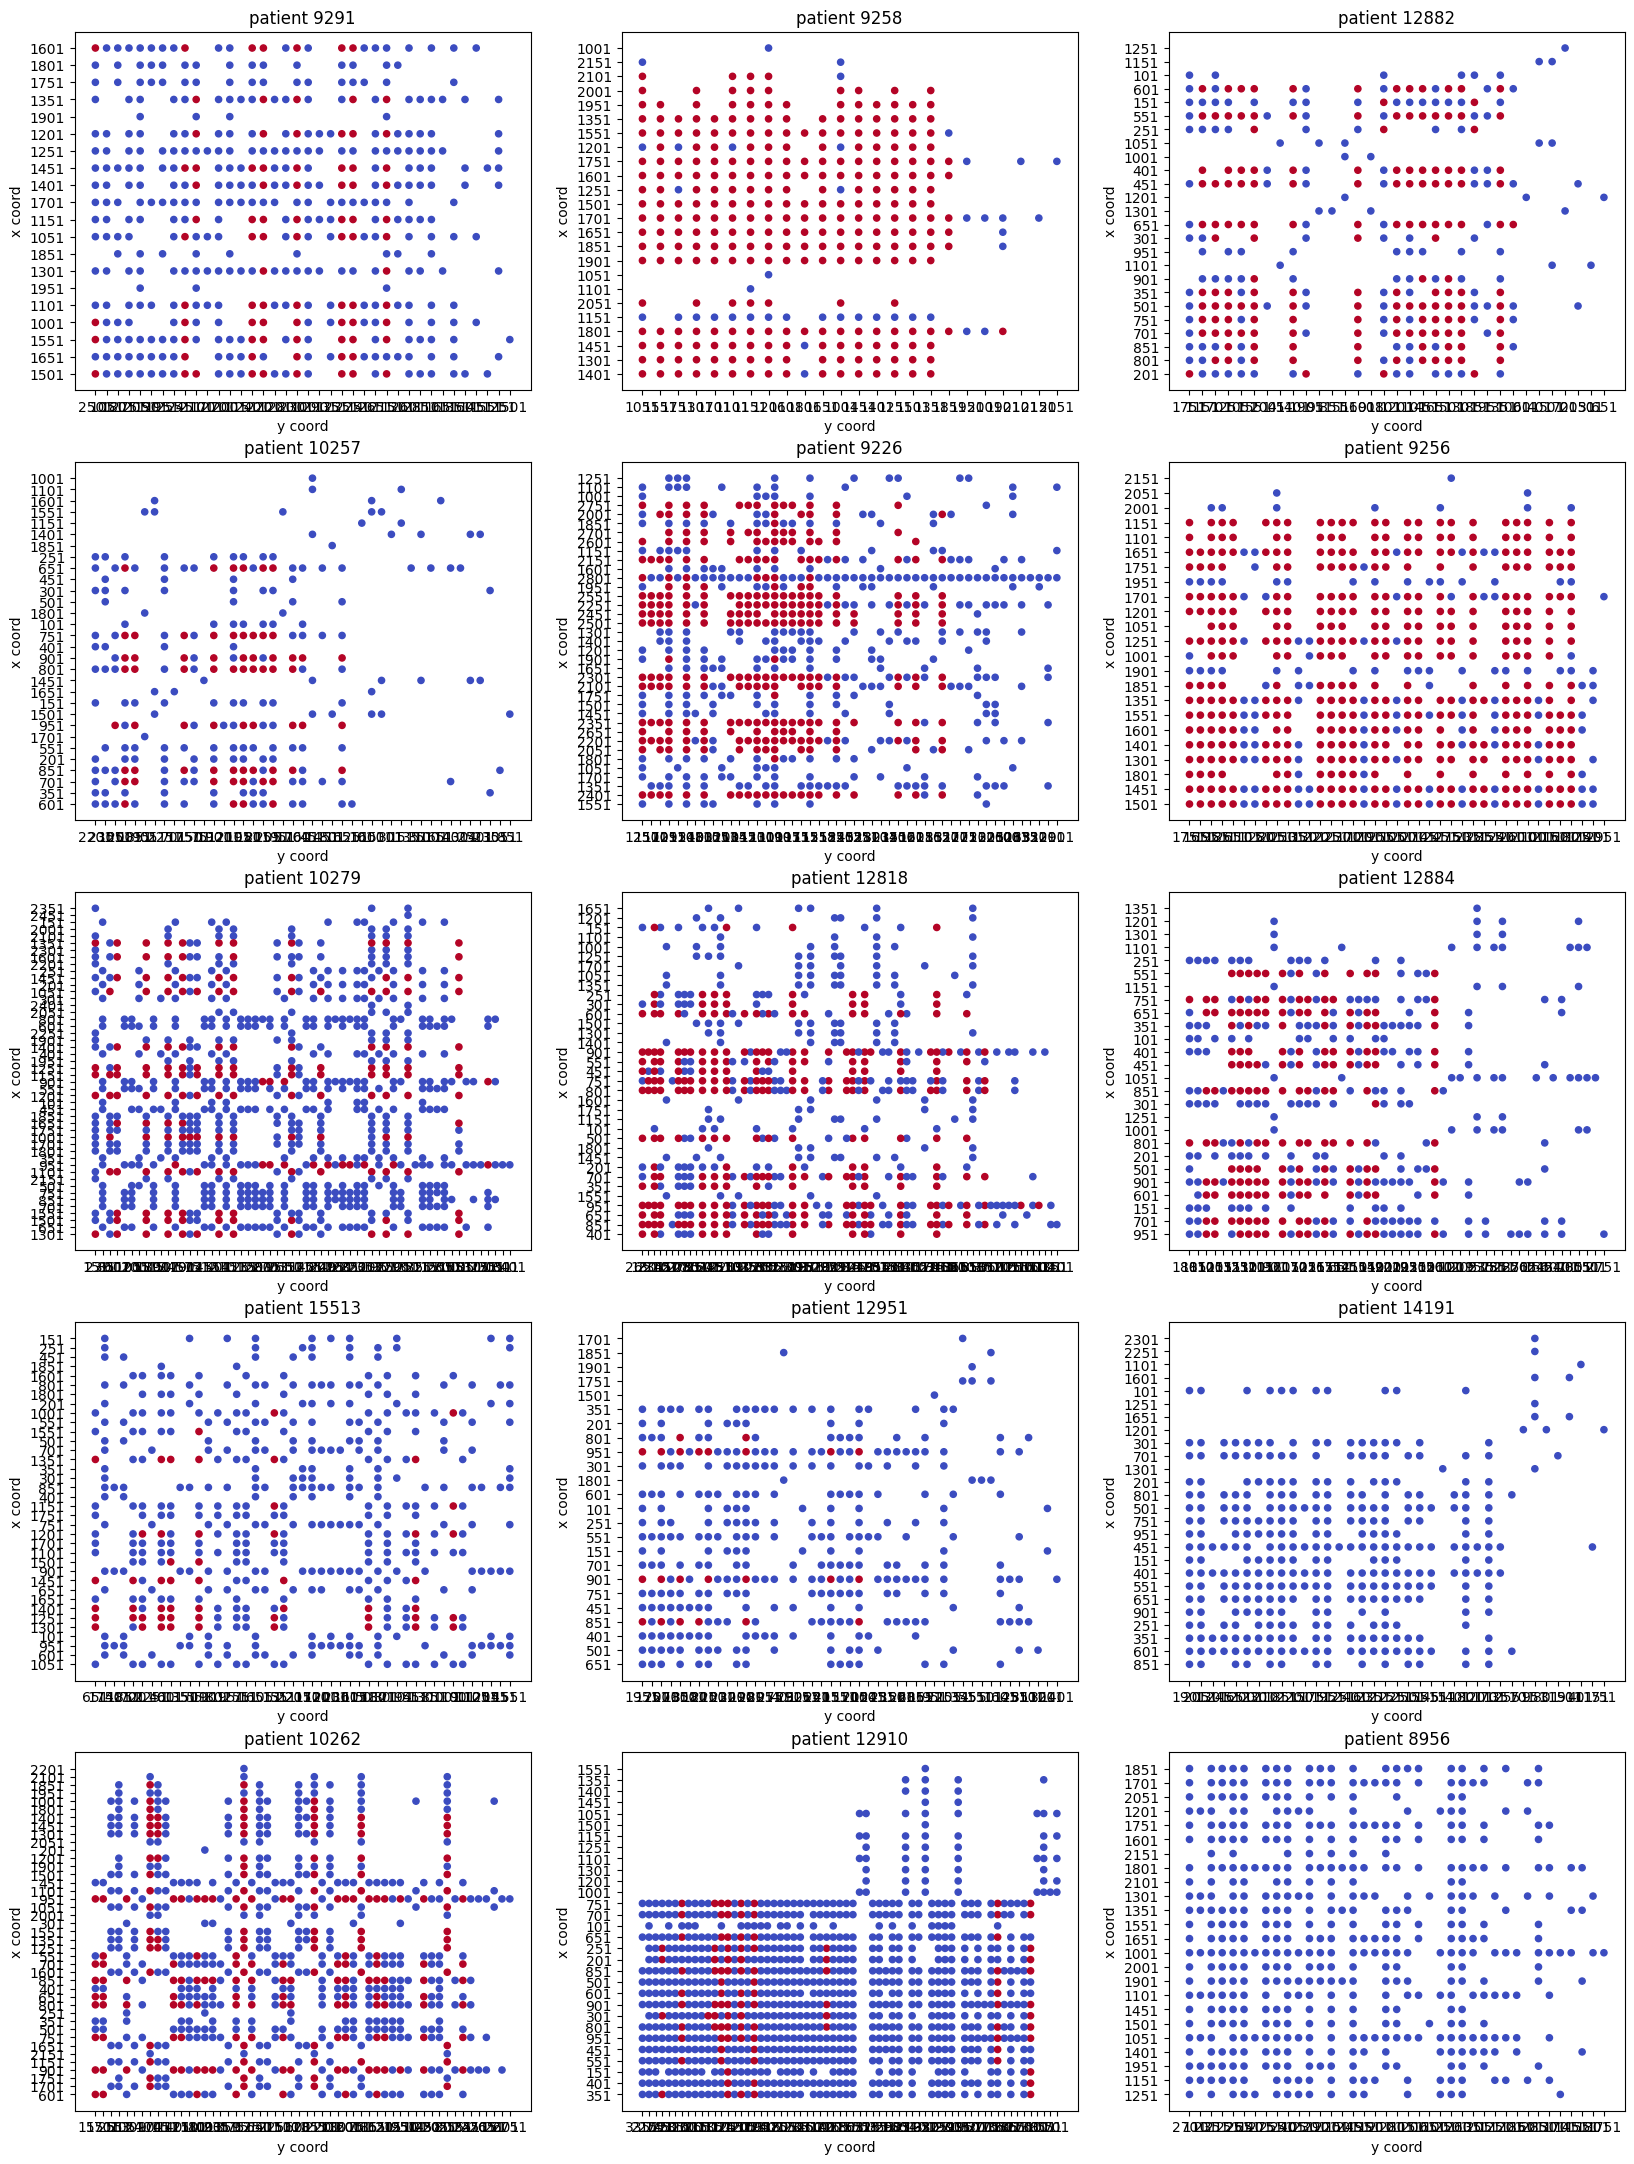

In [19]:
import matplotlib.pyplot as plt

def get_patient_dataframe(patient_id):
    """
    Fetches a dataframe for a given patient ID.

    Args:
        patient_id (str): The ID of the patient.

    Returns:
        pandas.DataFrame: A dataframe containing patient data.
    """
    return df_filtered[df_filtered['patient_id'] == patient_id]

fig, ax = plt.subplots(5,3,figsize=(20, 27))

patient_ids = df_filtered.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id) # Now you have defined the function 'get_patient_dataframe'

        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + patient_id)
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

# **Image Processing and selection**

Select a random carcinogenic image and visualize

<ipython-input-20-e44f106bae52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.target = df_filtered.target.astype(int)


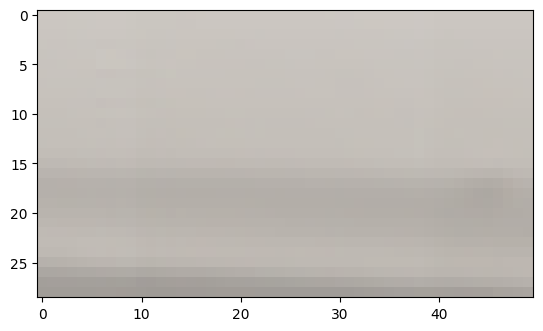

In [20]:
from skimage.filters import gaussian
from skimage.util import random_noise
import matplotlib.image as mpimg

df_filtered.target = df_filtered.target.astype(int)
random_image_path = np.random.choice(df_filtered[df_filtered.target ==0].index, size=1, replace=False,)
path =os.path.join(all_rays_dir,df_filtered.loc[random_image_path[0], 'image_id'])
image = mpimg.imread(path)
plt.imshow(image)


Use Gaussian filter to smooth and reduce detail. This reduces impact of high-frequency noise and making patterns more uniform then visualize the blur image.

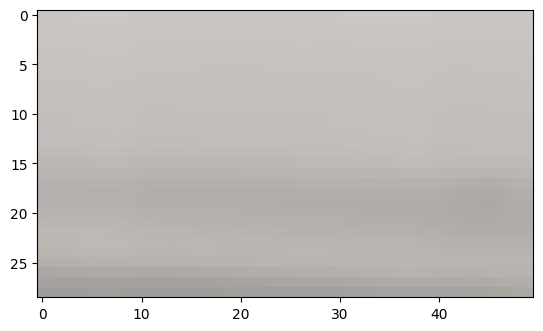

In [21]:
gaussian_image = gaussian(image)
plt.imshow(gaussian_image)

Apply the random_noise function to the image to introduce noise then display the noisy image to examine the effect of the noise. This helps in evaluating how well image processing algorithms can handle noisy data or for simulating conditions where images may be imperfect

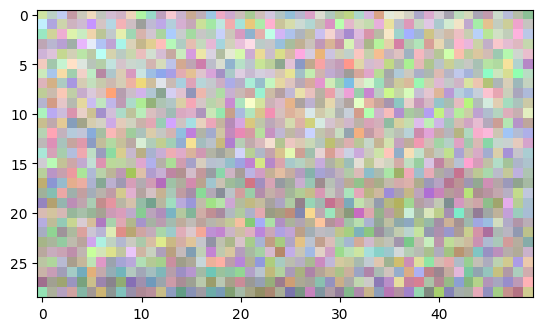

In [22]:
noise_image = random_noise(image)
plt.imshow(noise_image)

Apply random noise to the image  and visualize the result.This is useful for testing image processing techniques, especially those involving noise reduction or denoising algorithms, by evaluating how they perform on images with both smoothing and noise.

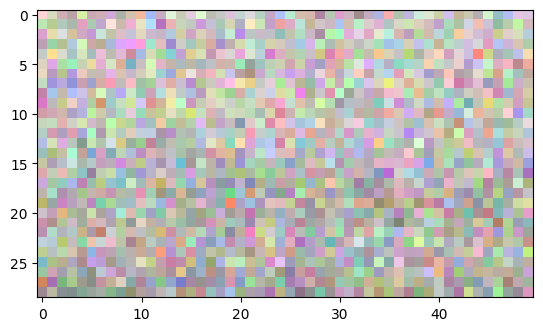

In [23]:
noise_gaussian_image = random_noise(gaussian_image)
plt.imshow(noise_gaussian_image)

Create directories to organize the processed images

In [24]:
# Processing using (random_noise) function
os.mkdir('image_processing')
os.mkdir('image_processing/noise_images')

Take the image from the normal images folder, process it by adding random noise to each image and then save the noisy images to the new file.


In [25]:
for normal_image in all_rays_dir_lst :
    path        = all_rays_dir+'/'+ normal_image
    img         = mpimg.imread( path ,0)
    noise_image = random_noise(img)
    fname       = normal_image
    new_path    = os.path.join('image_processing/noise_images',fname)
    mpimg.imsave(new_path, noise_image)

Organize the images in folders

In [26]:
os.mkdir( 'image_processing/processd_data_train')
os.mkdir( 'image_processing/processd_data_test')
os.mkdir( 'image_processing/processd_data_train/zeros')
os.mkdir( 'image_processing/processd_data_train/ones')
os.mkdir( 'image_processing/processd_data_test/zeros')
os.mkdir( 'image_processing/processd_data_test/ones')

Create a DataFrame containing the filenames of images from the created directories and preview the contents.

In [27]:
processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
processd_data.head()

image_id
0  9291_idx5_x2501_y1501_class1.png
1  9258_idx5_x1051_y1401_class1.png
2    9075_idx5_x701_y601_class1.png
3   9225_idx5_x1251_y701_class0.png
4   9043_idx5_x3201_y401_class1.png

Extract target variable from the dataframe and add it as a column in the dataframe for data preprocessing.

In [28]:
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5]
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0   9291_idx5_x2501_y1501_class1.png      1
1   9258_idx5_x1051_y1401_class1.png      1
2     9075_idx5_x701_y601_class1.png      1
3    9225_idx5_x1251_y701_class0.png      0
4    9043_idx5_x3201_y401_class1.png      1
5   12882_idx5_x1751_y201_class1.png      1
6   10257_idx5_x2201_y601_class0.png      0
7  12934_idx5_x1001_y1401_class0.png      0
8     9291_idx5_x651_y501_class0.png      0
9  15515_idx5_x1001_y1801_class0.png      0

Preview of processed data

In [29]:
processd_data['target'].value_counts()

target
0    198738
1     78786
Name: count, dtype: int64

Split the dataset into training and testing sets, prepare lists of image filenames for each set, and then copy the test images to a new directory based on whether they are carcinogenic(0's and 1's).

This process helps organize test images into separate directories, making it easier to use them for evaluation or further processing.

In [30]:
from sklearn.model_selection import train_test_split
y = processd_data['target']
processd_train, processd_test = train_test_split(processd_data, test_size=0.10, random_state=101, stratify=y)
processd_test_pls =processd_test.image_id
processd_train_pls =processd_train.image_id

processd_data.set_index('image_id', inplace=True)
for image in processd_test_pls:
    fname = image
    target = processd_data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join("image_processing/processd_data_test", label, fname)
    shutil.copyfile(src, dst)

Organize training images by copying them into the created labeled directories.

This helps in preparing data for training models, ensuring that images are stored in directories corresponding to their classes for easy access during model training.

In [31]:
for image in processd_train_pls:
    fname  = image
    target = processd_data.loc[image,'target']

    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(processd_lst_str, fname)
    dst = os.path.join('image_processing/processd_data_train', label, fname)
    shutil.copyfile(src, dst)

Print the number of images in each subdirectory of training and test datasets.

In [32]:
print(len(os.listdir('image_processing/processd_data_train/zeros')))
print(len(os.listdir('image_processing/processd_data_train/ones')))
print(len(os.listdir('image_processing/processd_data_test/zeros')))
print(len(os.listdir('image_processing/processd_data_test/ones')))

178864
70907
19874
7879



# Processing and Normal test

* The images we processed and the normal are tested on the same model to see which ones are the best in the accuracy
* For testing, we will tale a small sample of(20,000) images



Process the images  from a directory, extracts target labels, and store the information in a DataFrame

In [33]:

# First: the processed images

processd_lst = os.listdir('image_processing/noise_images')
processd_lst_str = 'image_processing/noise_images'
processd_data = pd.DataFrame(processd_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5]
    return target

processd_data['target'] = processd_data['image_id'].apply(extract_target)

processd_data.head(10)

image_id target
0   9291_idx5_x2501_y1501_class1.png      1
1   9258_idx5_x1051_y1401_class1.png      1
2     9075_idx5_x701_y601_class1.png      1
3    9225_idx5_x1251_y701_class0.png      0
4    9043_idx5_x3201_y401_class1.png      1
5   12882_idx5_x1751_y201_class1.png      1
6   10257_idx5_x2201_y601_class0.png      0
7  12934_idx5_x1001_y1401_class0.png      0
8     9291_idx5_x651_y501_class0.png      0
9  15515_idx5_x1001_y1801_class0.png      0

Create directories to organize the images into for modelling

In [34]:
os.mkdir( 'image_processing/model_tst')
os.mkdir( 'image_processing/model_tst/trainig')
os.mkdir( 'image_processing/model_tst/testing')
os.mkdir( 'image_processing/model_tst/trainig/zeros')
os.mkdir( 'image_processing/model_tst/trainig/ones')
os.mkdir( 'image_processing/model_tst/testing/zeros')
os.mkdir( 'image_processing/model_tst/testing/ones')

Organize image data into training and testing sets and prepare them for use in model training and evaluation.

In [35]:
df_0 = processd_data[processd_data['target'] == '0'].sample(10000, random_state=101)
df_1 = processd_data[processd_data['target'] == '1'].sample(10000, random_state=101)
test_data =pd.DataFrame(data)
test_data = pd.concat([df_0, df_1], axis=0).reset_index(drop=True)
test_y = test_data['target']
test_data_train, test_data_test = train_test_split(test_data, test_size=0.10, random_state=101, stratify=test_y)
sts_train = test_data_train.image_id
tst_test  = test_data_test.image_id
test_data.set_index('image_id', inplace=True)
for image in sts_train:
    fname  = image
    target = test_data.loc[image,'target']

    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/trainig', label, fname)
    shutil.copyfile(src, dst)
for image in tst_test:
    fname  = image
    target = test_data.loc[image,'target']

    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('image_processing/model_tst/testing', label, fname)
    shutil.copyfile(src, dst)

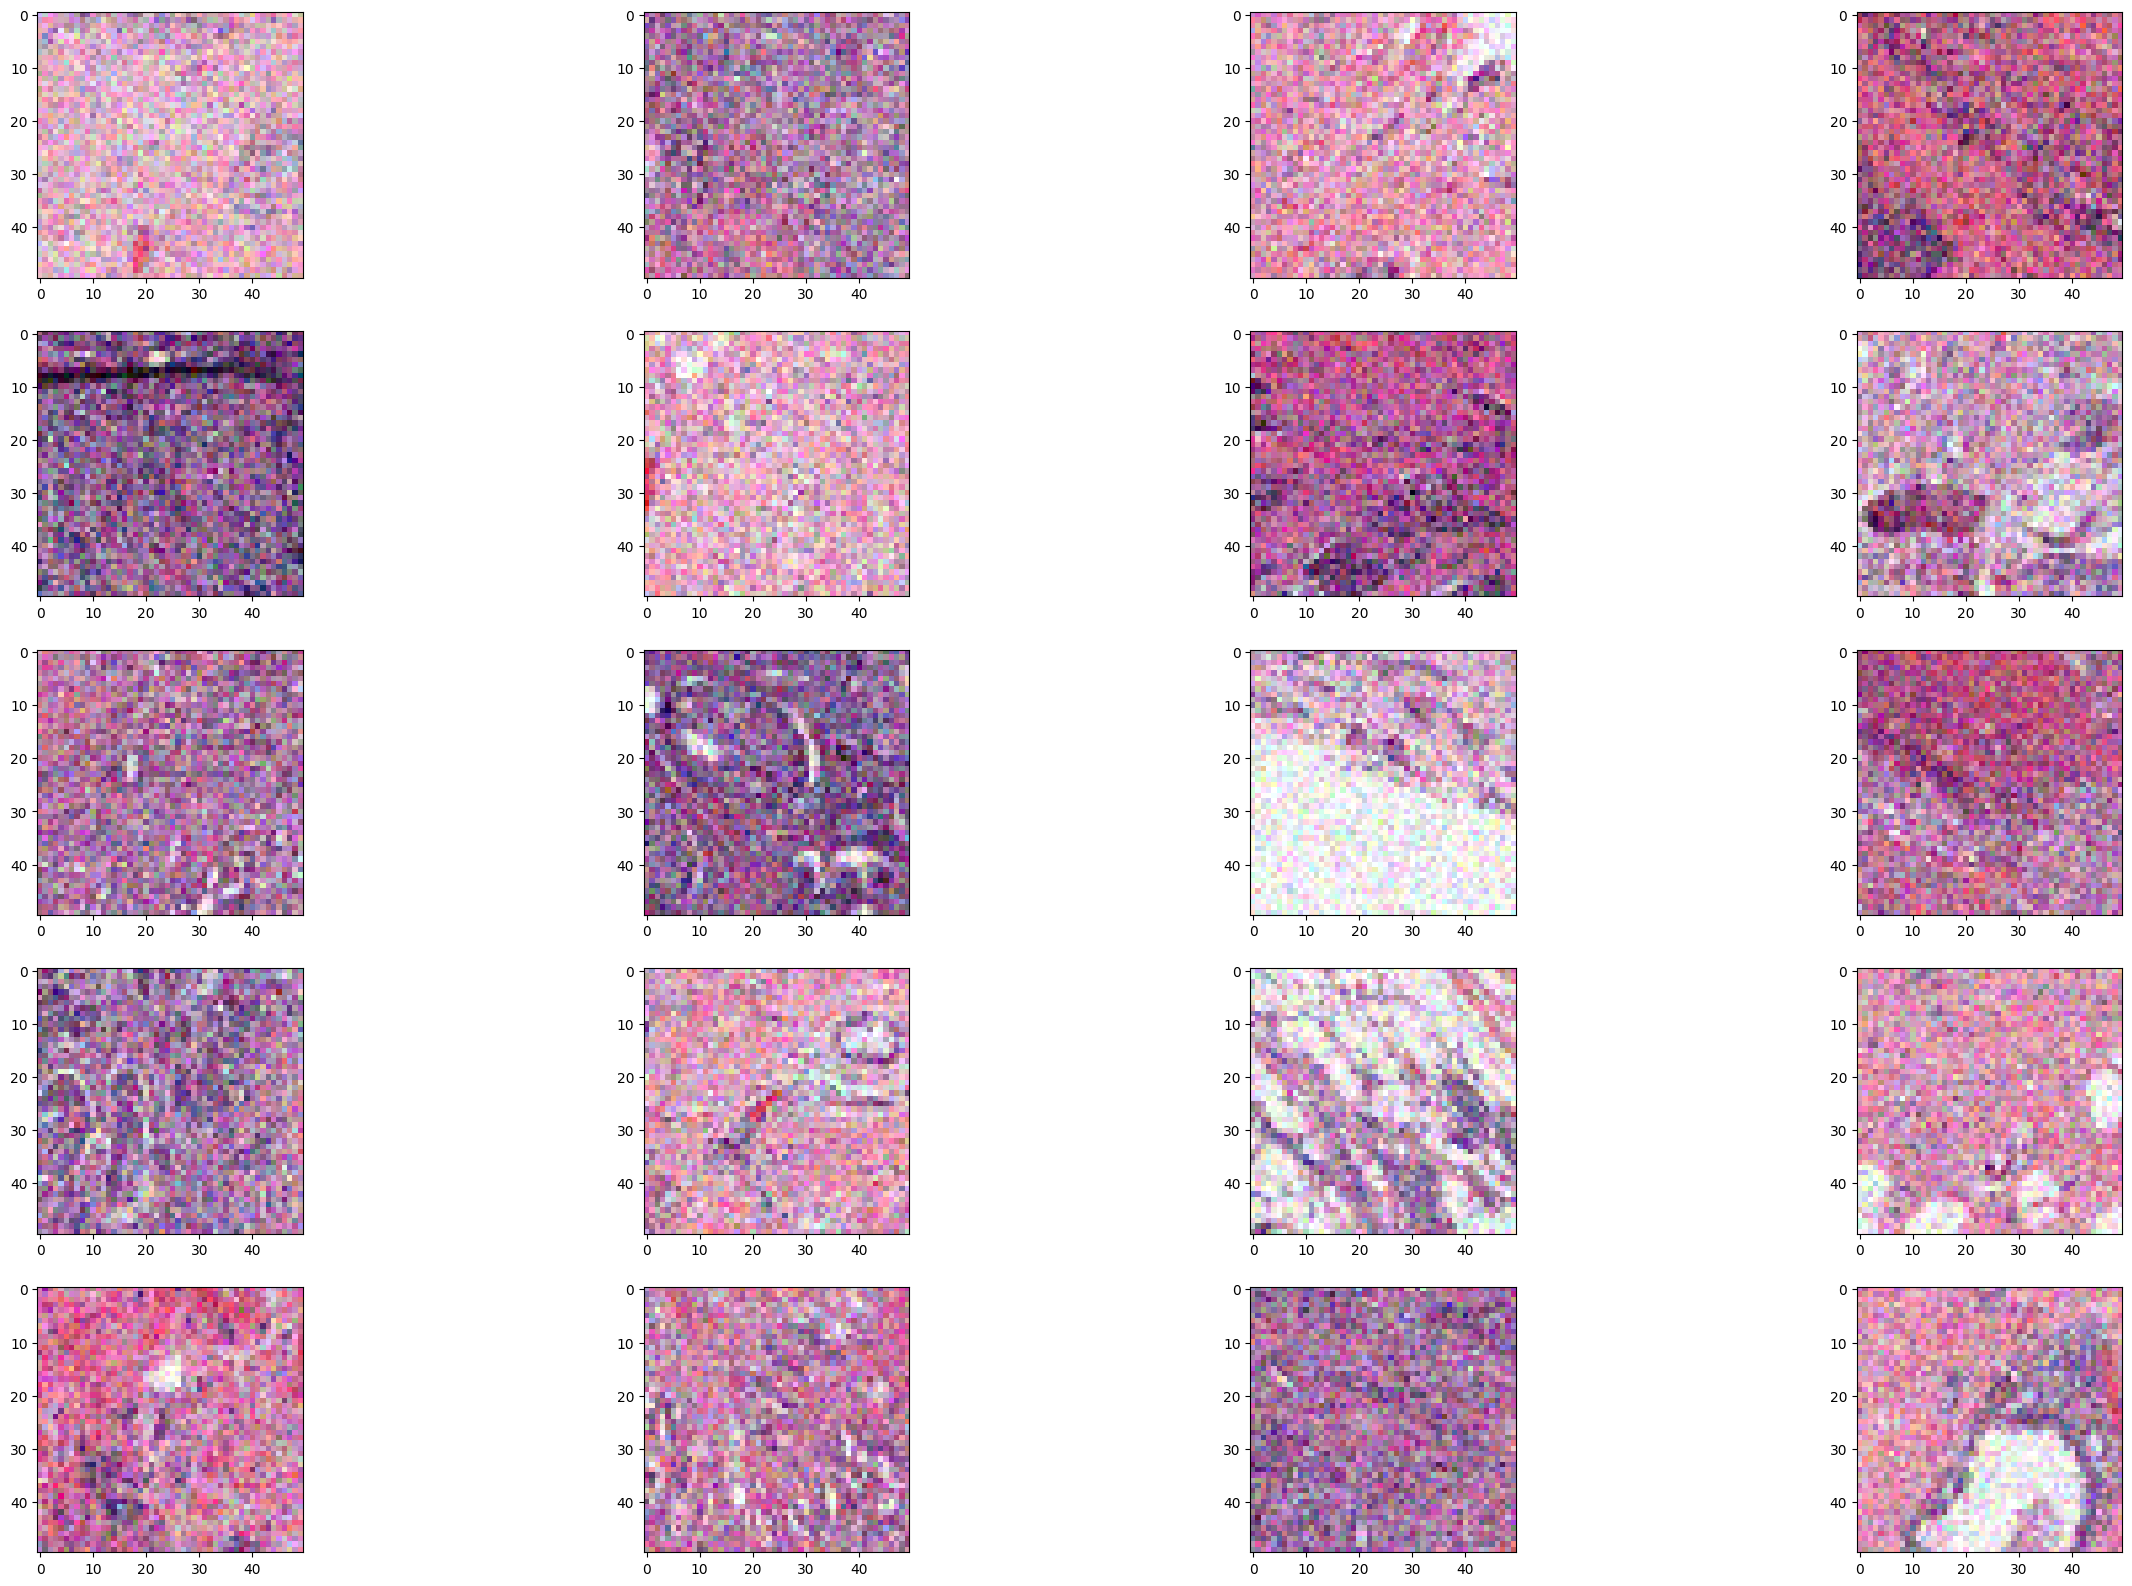

In [36]:
processd_data.target = processd_data.target.astype(int)
fig, ax = plt.subplots(5,4,figsize=(30,20))
pos_selection = np.random.choice(processd_data[processd_data.target==1].index.values, size=20, replace=False)
neg_selection = np.random.choice(processd_data[processd_data.target==0].index.values, size=20, replace=False)
for n in range(5):
    for m in range(4):
        idx = pos_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

   Preview  of some of the processed carcinogenic images

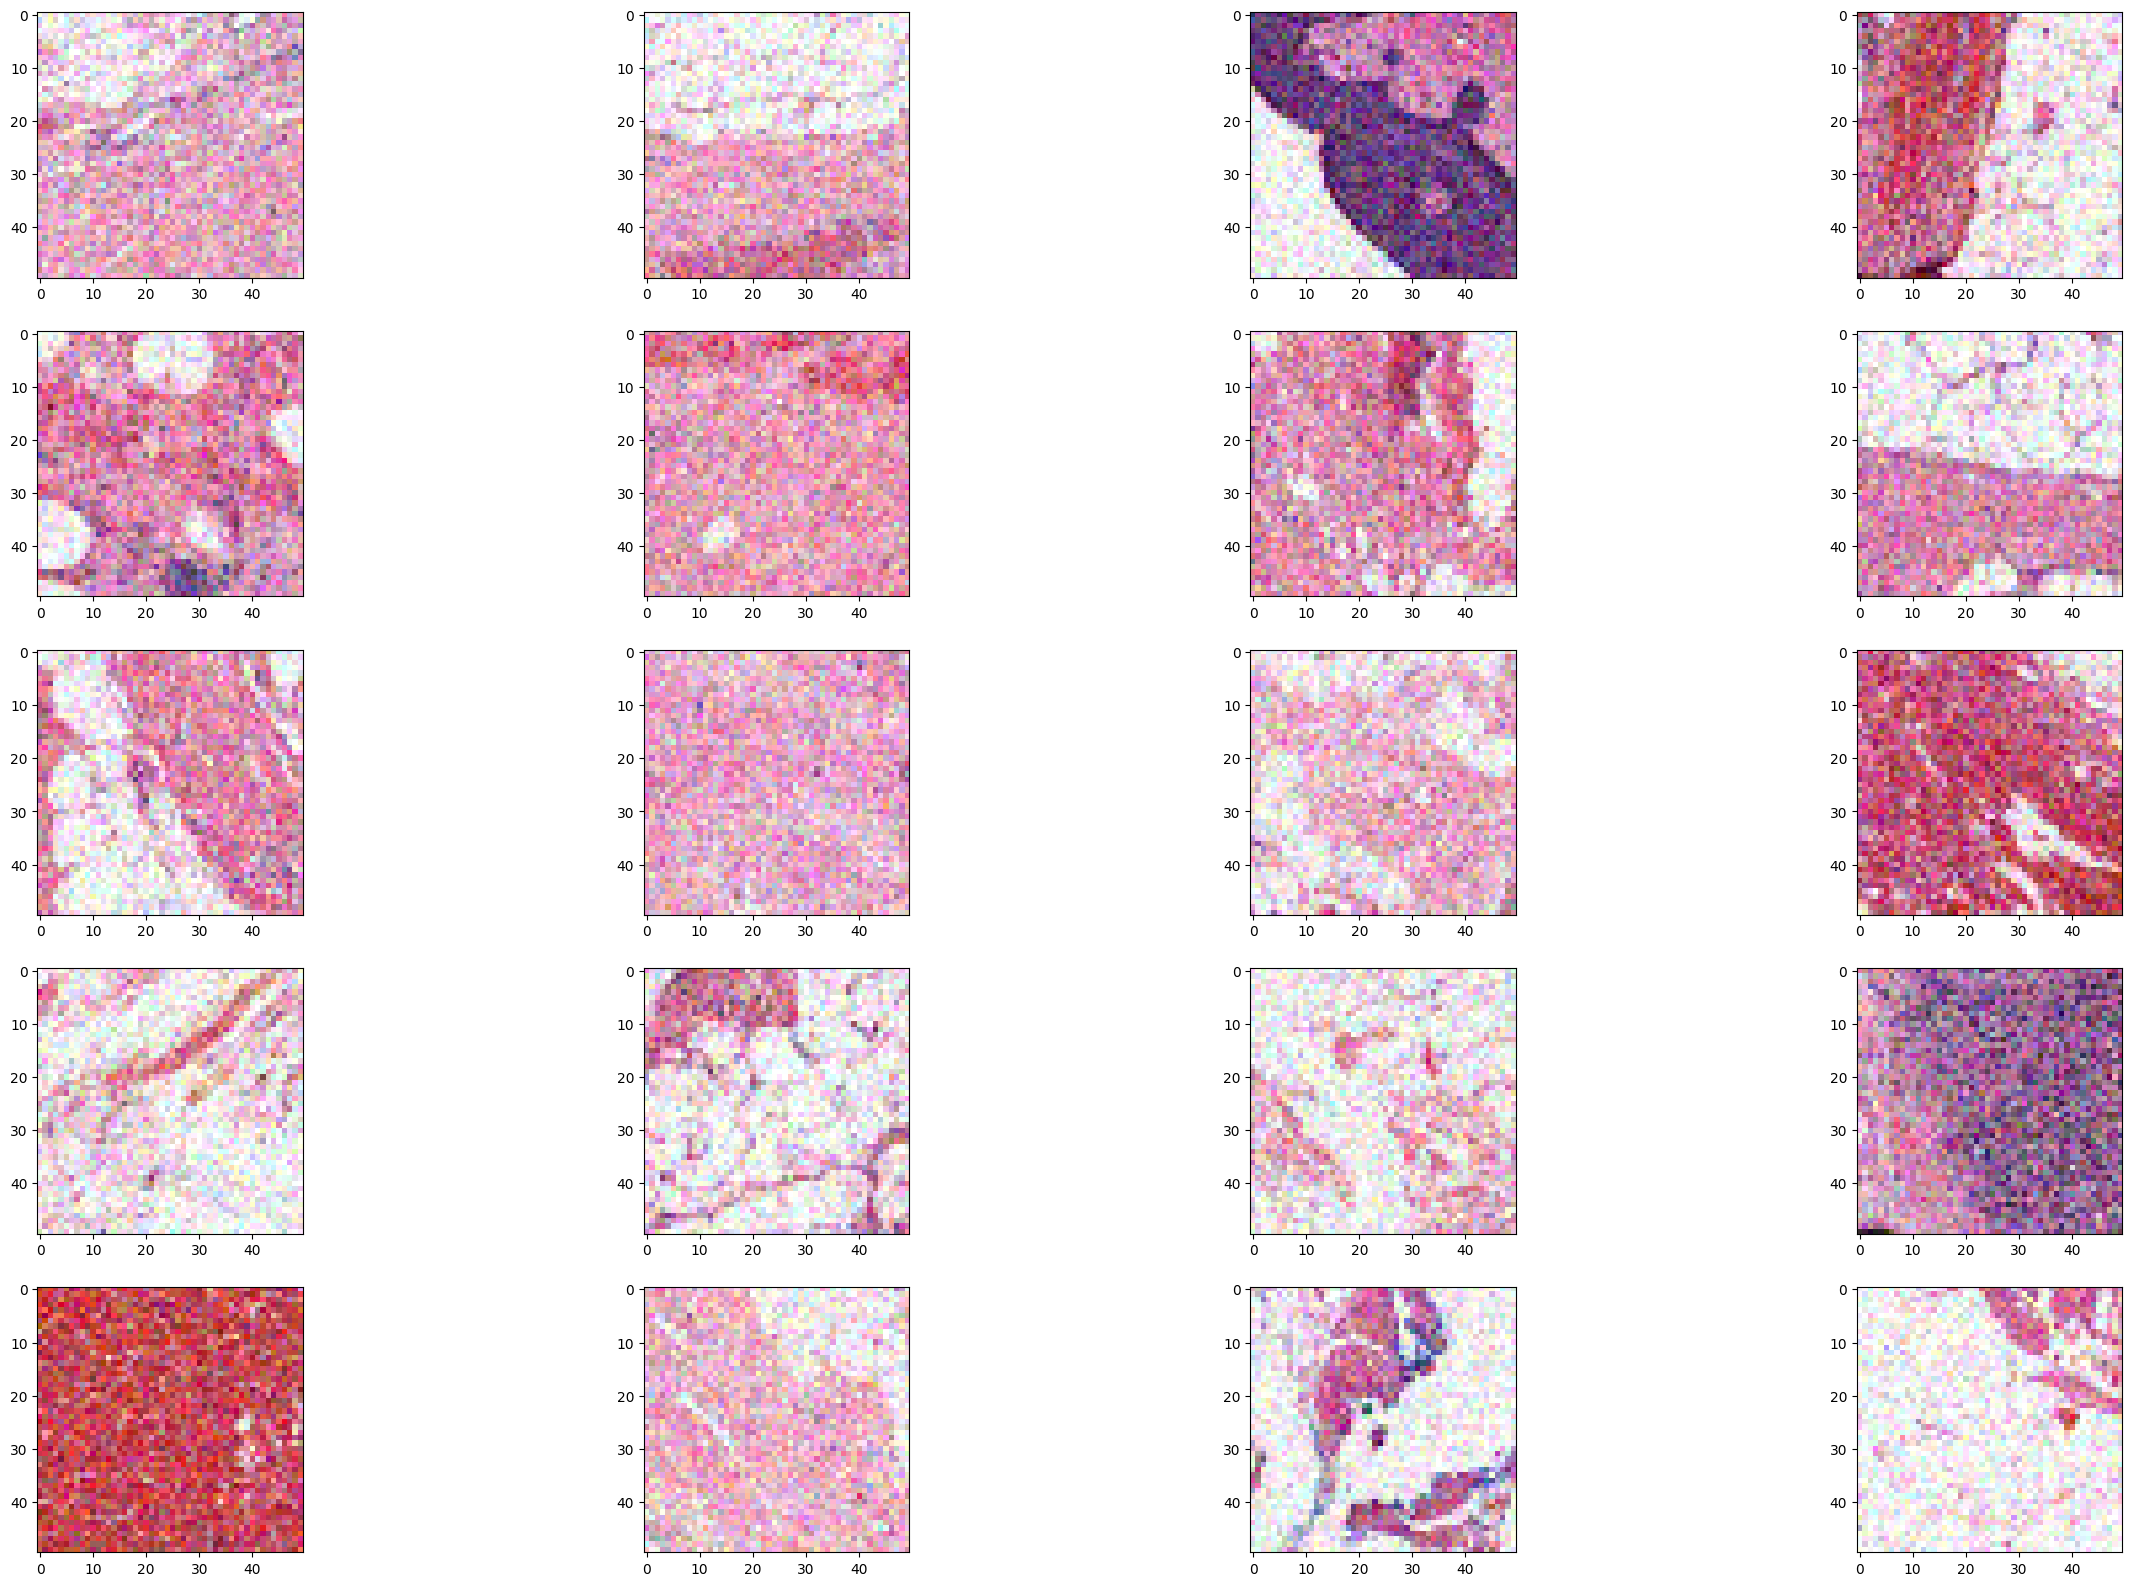

In [37]:
fig, ax = plt.subplots(5,4,figsize=(30,20))
for n in range(5):
    for m in range(4):
        idx = neg_selection[m + 4*n]
        path =os.path.join(processd_lst_str,processd_data.loc[idx, 'image_id'])
        image = mpimg.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

Preview of some of the normal images that have been processed

In [38]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D,Dropout,MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [39]:
data_processd_test_generation = ImageDataGenerator(rescale=1.0/255)
train_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/trainig", target_size=(50,50), batch_size=10,class_mode='categorical')
test_generation_processd = data_processd_test_generation.flow_from_directory("image_processing/model_tst/testing",target_size=(50,50),batch_size=10,class_mode='categorical')

Found 18000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


Run a simple CNN model to see against processed and normal images to determine which ones to use for modelling.

In [40]:
CNNmodel_im_norm =Sequential()
CNNmodel_im_norm.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(50,50,3),activation='relu'))
CNNmodel_im_norm.add(MaxPool2D(pool_size=(2,2)))


CNNmodel_im_norm.add(Flatten())

CNNmodel_im_norm.add(Dense(128,activation='relu'))
CNNmodel_im_norm.add(Dense(2,activation='softmax'))

CNNmodel_im_norm.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

CNNmodel_im_norm.fit(train_generation_processd,
                     validation_data=test_generation_processd,
                     epochs=10,
                     verbose=1,
                     callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1800/1800 ━━━━━━━━━━━━━━━━━━━━ 129s 70ms/step - accuracy: 0.7070 - loss: 0.6103 - val_accuracy: 0.7850 - val_loss: 0.4933
Epoch 2/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 123s 69ms/step - accuracy: 0.7709 - loss: 0.4952 - val_accuracy: 0.7865 - val_loss: 0.4787
Epoch 3/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 121s 67ms/step - accuracy: 0.7884 - loss: 0.4696 - val_accuracy: 0.7880 - val_loss: 0.4629
Epoch 4/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 145s 69ms/step - accuracy: 0.7951 - loss: 0.4545 - val_accuracy: 0.7505 - val_loss: 0.5109
Epoch 5/10
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 138s 67ms/step - accuracy: 0.7918 - loss: 0.4629 - val_accuracy: 0.7435 - val_loss: 0.5168


# Conclusion :

Normal images are the best in modeling with an accuracy of 79%. We wil proceed with them for data modelling.

# Modeling

Data Spliting & Generation

In [41]:
data = pd.DataFrame(all_rays_dir_lst, columns=['image_id'])
def extract_target(x):
    a = x.split('_')
    b = a[4]
    target = b[5]
    return target

data['target'] = data['image_id'].apply(extract_target)

data.head()

image_id target
0  9291_idx5_x2501_y1501_class1.png      1
1  9258_idx5_x1051_y1401_class1.png      1
2    9075_idx5_x701_y601_class1.png      1
3   9225_idx5_x1251_y701_class0.png      0
4   9043_idx5_x3201_y401_class1.png      1

Extract the target column from the Dataframe and assign it to the variable y. Then split the data into training and testing sets.

In [42]:
y = data['target']
data_train, data_test = train_test_split(data, test_size=0.10, random_state=101, stratify=y)

Print the training and testing dataset

In [43]:
print(data_train.shape)
print(data_test.shape)

(249771, 2)
(27753, 2)


Create train_dir & test_dir to organize and store training and testing data files. This is to safely separate data used in training and testing the model.

In [44]:
os.mkdir( 'train_dir')
os.mkdir('test_dir')

create train and test sub directories to store our defined dataset with labels (0,1)

In [45]:
os.mkdir( 'train_dir/zeros')
os.mkdir( 'train_dir/ones')

os.mkdir( 'test_dir/zeros')
os.mkdir( 'test_dir/ones')

Extract image_id's from the test and train data and assign them the to the variables ttain and test. This is useful in referncing image_id's in the respective drectories.

In [46]:
train = data_train.image_id
test  = data_test.image_id

Iterate over the training image IDs, determine the target label for each image, and copy the files to the appropriate directory to help in managing the dataset for training our models with images labeled as 0's and 1's.

In [47]:
data.set_index('image_id', inplace=True)
for image in train:
    fname  = image
    target = data.loc[image,'target']

    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join('train_dir', label, fname)
    shutil.copyfile(src, dst)

Iterate over the testing image IDs, determine the target label for each image, and copy the files to the appropriate directory to help in managing the evaluation of the dataset  our models with images labeled as 0's and 1's.

In [48]:
for image in test:
    fname = image
    target = data.loc[image,'target']
    if target == '0':
        label = 'zeros'
    if target == '1':
        label = 'ones'
    src = os.path.join(all_rays_dir, fname)
    dst = os.path.join("test_dir", label, fname)
    shutil.copyfile(src, dst)

Preview of the number of images in eaxh directory.

In [49]:
print('non-IDC train      =',len(os.listdir('train_dir/zeros')))
print('IDC train          =',len(os.listdir('train_dir/ones')))
print('non-IDC validation =',len(os.listdir('test_dir/zeros')))
print('IDC validation     =',len(os.listdir('test_dir/ones')))

non-IDC train      = 178864
IDC train          = 70907
non-IDC validation = 19874
IDC validation     = 7879


Create an ImageDataGenerator instance to normalize image pixel values by scaling them to the [0, 1] range. This ensures that the input features are in a consistent and appropriate range

In [50]:
data_generation = ImageDataGenerator(rescale=1.0/255)

Using the flow_from_directory method to set up data pipeline for loading, resizing, batching, and labeling images for both training and testing phases. We load images from train and test directory, resize to 32*32 pixels,have the images to batch size of 10 and encode labels in a categorical format.

In [51]:
train_generation = data_generation.flow_from_directory(
                                        "train_dir",
                                        target_size=(32,32),
                                        batch_size=10,
                                        class_mode='categorical')
test_generation = data_generation.flow_from_directory(
                                        "test_dir",
                                        target_size=(32,32),
                                        batch_size=10,
                                        class_mode='categorical')

Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


# Insight:
* Images loaded, resized, batched and preprocessed in the train directory are 249,771 for those with cancer and those without(2 classes)
* Images loaded, resized, batched and preprocessed in the test directory are 27,753 for those with cancer and those without(2 classes)

# Model design


# **BASELINE MODEL- SIMPLE CNN MODEL**

In [ ]:
#preprocess for CNN
import os
import numpy as np
from PIL import Image
from tqdm import tqdm

# Define paths
dataset_path = '../input/breast-histopathology-images/IDC_regular_ps50_idx5/'
preprocessed_path = '../input/preprocessed_breast_histopathology_images/' #destination for preprocessed images

# Ensure the destination directory exists
os.makedirs(preprocessed_path, exist_ok=True)

# Function to preprocess images
def preprocess_images(src_dir, dest_dir, image_size=(50, 50)):
    for root, _, files in os.walk(src_dir):
        for file in tqdm(files):
            if file.endswith('.png'):
                img_path = os.path.join(root, file)
                img = Image.open(img_path)

                # Resize image
                img = img.resize(image_size)

                # Convert to numpy array
                img_array = np.array(img)

                # Normalize pixel values
                img_array = img_array / 255.0

                # Save preprocessed image
                save_path = os.path.join(dest_dir, os.path.relpath(img_path, src_dir))
                save_dir = os.path.dirname(save_path)
                os.makedirs(save_dir, exist_ok=True)
                Image.fromarray((img_array * 255).astype(np.uint8)).save(save_path)

# Perform preprocessing
preprocess_images(dataset_path, preprocessed_path)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 337/337 [00:00<00:00, 581.08it/s]
0it [00:00, ?it/s]
100%|██████████| 115/115 [00:00<00:00, 543.00it/s]
0it [00:00, ?it/s]
100%|██████████| 239/239 [00:00<00:00, 574.50it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 337/337 [00:00<00:00, 809.99it/s]
0it [00:00, ?it/s]
100%|██████████| 115/115 [00:00<00:00, 669.20it/s]
0it [00:00, ?it/s]
100%|██████████| 239/239 [00:00<00:00, 566.98it/s]
0it [00:00, ?it/s]
100%|██████████| 1211/1211 [00:01<00:00, 728.69it/s]
0it [00:00, ?it/s]
100%|██████████| 195/195 [00:00<00:00, 770.34it/s]
0it [00:00, ?it/s]
100%|██████████| 451/451 [00:00<00:00, 803.91it/s]
0it [00:00, ?it/s]
100%|██████████| 68/68 [00:00<00:00, 802.65it/s]
0it [00:00, ?it/s]
100%|██████████| 1206/1206 [00:01<00:00, 785.60it/s]
0it [00:00, ?it/s]
100%|██████████| 51/51 [00:00<00:00, 834.51it/s]
0it [00:00, ?it/s]
100%|██████████| 369/369 [00:00<00:00, 588.26it/s]
0it [00:00, ?it/s]
100%|██████████| 86/86 [00:00<00:

SPLITTING THE DATA

In [56]:
import os
from sklearn.model_selection import train_test_split
import shutil

# Define paths
preprocessed_path = '../input/preprocessed_breast_histopathology_images/'
train_path = '../input/train/'
val_path = '../input/val/'
test_path = '../input/test/'

# Ensure directories exist
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Gather all image paths
image_paths = []
for root, _, files in os.walk(preprocessed_path):
    for file in files:
        if file.endswith('.png'):
            image_paths.append(os.path.join(root, file))

# Split the data
train_paths, test_paths = train_test_split(image_paths, test_size=0.2, random_state=42)
train_paths, val_paths = train_test_split(train_paths, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

# Function to copy files to respective directories
def copy_files(file_paths, destination):
    for file_path in file_paths:
        dest_path = os.path.join(destination, os.path.relpath(file_path, preprocessed_path))
        os.makedirs(os.path.dirname(dest_path), exist_ok=True)
        shutil.copy(file_path, dest_path)

# Copy files
copy_files(train_paths, train_path)
copy_files(val_paths, val_path)
copy_files(test_paths, test_path)

In [ ]:
#creating datasets and dataloaders

import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image

class HistopathologyDataset(Dataset):
    def __init__(self, image_paths, transform=None):
        self.image_paths = image_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path)
        if self.transform:
            image = self.transform(image)
        label = 1 if 'class1' in img_path else 0 #for the labels 0 and 1
        return image, label

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

# Create datasets
train_dataset = HistopathologyDataset(train_paths, transform=transform)
val_dataset = HistopathologyDataset(val_paths, transform=transform)
test_dataset = HistopathologyDataset(test_paths, transform=transform)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [ ]:
#modeling
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Calculate the flattened size
        self.flattened_size = self._get_flattened_size()

        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        # Pass a dummy input through the conv and pooling layers to calculate the size
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleCNN()

In [ ]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import confusion_matrix
from google.colab import drive

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Assume 'model' and 'train_loader', 'val_loader' are defined
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Mount Google Drive to save the model later
drive.mount('/content/drive')
model_path = '/content/drive/My Drive/path_to_save_model/best_model.pth'

# Training loop
for epoch in range(50):  # Increase number of epochs for demonstration
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss /= len(val_loader)
    accuracy = 100 * correct / total
    sensitivity, specificity = calculate_metrics(all_labels, all_preds)

    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {accuracy}%")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Ensure the parent directory for the model exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model to Google Drive
torch.save(model.state_dict(), model_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 1, Loss: 0.1287515522270518
Validation Loss: 0.27739672674072813
Validation Accuracy: 91.63498783893343%
Sensitivity: 0.8185504469987228
Specificity: 0.9547873007905634
Epoch 2, Loss: 0.10961112868804344
Validation Loss: 0.3296196679171357
Validation Accuracy: 91.24673452842086%
Sensitivity: 0.769125159642401
Specificity: 0.9688041159493036
Epoch 3, Loss: 0.09463750117706356
Validation Loss: 0.3180753467963493
Validation Accuracy: 92.03765426538149%
Sensitivity: 0.8425287356321839
Specificity: 0.9509725185092233


In [ ]:
import os

# ... (rest of your code)

# Ensure the parent directory for the model exists
os.makedirs(os.path.dirname(model_path), exist_ok=True)

# Save the model to Google Drive
torch.save(model.state_dict(), model_path)

In [ ]:
import torch.optim as optim
import torch.nn as nn
from sklearn.metrics import confusion_matrix

class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.best_score = None
        self.counter = 0
        self.early_stop = False

    def __call__(self, validation_loss):
        if self.best_score is None:
            self.best_score = validation_loss
        elif validation_loss > self.best_score - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = validation_loss
            self.counter = 0

def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)  # Recall
    specificity = tn / (tn + fp)
    return sensitivity, specificity

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize early stopping
early_stopping = EarlyStopping(patience=3, min_delta=0.01)

# Training loop
for epoch in range(50):  # Increase number of epochs for demonstration
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader)}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0.0
    all_labels = []
    all_preds = []
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    val_loss /= len(val_loader)
    accuracy = 100 * correct / total
    sensitivity, specificity = calculate_metrics(all_labels, all_preds)

    print(f"Validation Loss: {val_loss}")
    print(f"Validation Accuracy: {accuracy}%")
    print(f"Sensitivity: {sensitivity}")
    print(f"Specificity: {specificity}")

    # Check early stopping
    early_stopping(val_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Save the model
torch.save(model.state_dict(), 'best_model.pth')

Epoch 1, Loss: 0.326426696444616
Validation Loss: 0.3007898643548447
Validation Accuracy: 87.3786145392307%
Sensitivity: 0.6998538197534003
Specificity: 0.9425963641849588
Epoch 2, Loss: 0.28676917073105695
Validation Loss: 0.28296508434891526
Validation Accuracy: 87.99207278623547%
Sensitivity: 0.761916867929325
Specificity: 0.9266048125518594
Epoch 3, Loss: 0.26384174187834464
Validation Loss: 0.2704818695772879
Validation Accuracy: 88.67129087469597%
Sensitivity: 0.7415787466632769
Specificity: 0.9441301450805863
Epoch 4, Loss: 0.2378999987863388
Validation Loss: 0.26426761592027087
Validation Accuracy: 89.2054769840555%
Sensitivity: 0.7683996440828779
Specificity: 0.9409745794674511
Epoch 5, Loss: 0.20874427929398912
Validation Loss: 0.2956439596506893
Validation Accuracy: 88.81542203405098%
Sensitivity: 0.8154951061395703
Specificity: 0.9168992481959216
Epoch 6, Loss: 0.18116104252149476
Validation Loss: 0.2665893554102404
Validation Accuracy: 90.32159264931087%
Sensitivity: 0.805

Insights

the simple CNN achieves an accuracy of 90.32%, sensitivity of 80.5% and specificity of 94.19% percent after 6 epochs with early stopping to reduce overfitting

# ResNet50 Model

Import neccesary packages

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [ ]:
# Load ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can change the number of units
predictions = Dense(train_generation.num_classes, activation='softmax')(x)

# Instantiate the  model
ResNetmodel = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
ResNetmodel.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
ResNetmodel.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,687,938 (97.99 MB)

 Trainable params: 2,100,226 (8.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Train the model
ResNetmodel.fit(
    train_generation,
    steps_per_epoch=train_generation.samples // train_generation.batch_size,
    validation_data=test_generation,
    validation_steps=test_generation.samples // test_generation.batch_size,
    epochs=10 # You can adjust the number of epochs
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


24977/24977 ━━━━━━━━━━━━━━━━━━━━ 3473s 139ms/step - accuracy: 0.7224 - loss: 0.5831 - val_accuracy: 0.7626 - val_loss: 0.5152
Epoch 2/10
    1/24977 ━━━━━━━━━━━━━━━━━━━━ 54:57 132ms/step - accuracy: 0.7000 - loss: 0.4852

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24977/24977 ━━━━━━━━━━━━━━━━━━━━ 8s 333us/step - accuracy: 0.7000 - loss: 0.4852 - val_accuracy: 1.0000 - val_loss: 0.3509
Epoch 3/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 3462s 139ms/step - accuracy: 0.7561 - loss: 0.5158 - val_accuracy: 0.7666 - val_loss: 0.5080
Epoch 4/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1s 19us/step - accuracy: 0.8000 - loss: 0.4601 - val_accuracy: 1.0000 - val_loss: 0.2800
Epoch 5/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 3522s 141ms/step - accuracy: 0.7609 - loss: 0.5087 - val_accuracy: 0.7587 - val_loss: 0.5025
Epoch 6/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 6s 232us/step - accuracy: 0.7000 - loss: 0.6290 - val_accuracy: 0.6667 - val_loss: 0.8748
Epoch 7/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 3539s 142ms/step - accuracy: 0.7648 - loss: 0.5038 - val_accuracy: 0.7664 - val_loss: 0.4969
Epoch 8/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1s 19us/step - accuracy: 0.7000 - loss: 0.6319 - val_accuracy: 0.6667 - val_loss: 0.4781
Epoch 9/10
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 3473s 138ms/step - acc

Preview training history with ResNetModels performance metrics

In [ ]:
losse1 = pd.DataFrame(ResNetmodel.history.history)
losse1.head()

accuracy      loss  val_accuracy  val_loss
0  0.737745  0.542579      0.762559  0.515182
1  0.700000  0.485243      1.000000  0.350878
2  0.757468  0.514180      0.766631  0.508028
3  0.800000  0.460060      1.000000  0.279956
4  0.762265  0.506879      0.758667  0.502454

Create a line plot comparing the accuracy of the model on the training data (accuracy) and validation data (val_accuracy) over the epochs to understand how well the model is performing during training and whether it is generalizing well to unseen data.

In [ ]:
losse1[['accuracy','val_accuracy']].plot()

 Create a line plot comparing the loss of the model on the training data (loss) and validation data (val_loss) over the epochs to understand how well the model is minimizing loss during training and whether it is generalizing well to unseen data.

In [ ]:
losse1[['loss','val_loss']].plot()

# ResNet50 Model Summary:

The RestNet model shows fluctuations in accuracy and loss across epochs with unusual spikes in validation accuracy.There are indications of overfitting especially on epochs with noticeabe drop in both training and validation accuracy and an increase in loss. We will use EfficientNet Model to see if the model performs better than ResNet50.

The model performed well at the 10th epoch with a 90% accuracy

EfficientNet Model

In [ ]:
from tensorflow.keras.applications.efficientnet import EfficientNetB0

# Load EfficientNetB0 with pretrained weights, excluding the top fully connected layers
base_model_1 = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom top layers for our specific task
x = base_model_1.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)  # You can change the number of units
predictions = Dense(train_generation.num_classes, activation='softmax')(x)

# Create the full model
EfficientNetmodel = Model(inputs=base_model_1.input, outputs=predictions)

# Freeze the layers of the base model
for layer in base_model_1.layers:
    layer.trainable = False

# Compile the model
EfficientNetmodel.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training EfficientNet Model

In [ ]:
# Train the model
EfficientNetmodel.fit(
    train_generation,
    steps_per_epoch=train_generation.samples // train_generation.batch_size,
    validation_data=test_generation,
    validation_steps=test_generation.samples // test_generation.batch_size,
    epochs=8 # Adjust the number of epochs for fine-tuning
)

Epoch 1/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1892s 75ms/step - accuracy: 0.7151 - loss: 0.6016 - val_accuracy: 0.7161 - val_loss: 0.5970
Epoch 2/8
    1/24977 ━━━━━━━━━━━━━━━━━━━━ 43:44 105ms/step - accuracy: 0.9000 - loss: 0.4391

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24977/24977 ━━━━━━━━━━━━━━━━━━━━ 6s 223us/step - accuracy: 0.9000 - loss: 0.4391 - val_accuracy: 0.6667 - val_loss: 0.6395
Epoch 3/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1856s 74ms/step - accuracy: 0.7163 - loss: 0.5965 - val_accuracy: 0.7161 - val_loss: 0.5966
Epoch 4/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.5000 - loss: 0.7906 - val_accuracy: 0.3333 - val_loss: 0.9402
Epoch 5/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1919s 76ms/step - accuracy: 0.7170 - loss: 0.5958 - val_accuracy: 0.7161 - val_loss: 0.5966
Epoch 6/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 0s 14us/step - accuracy: 0.7000 - loss: 0.6117 - val_accuracy: 1.0000 - val_loss: 0.3311
Epoch 7/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 1879s 75ms/step - accuracy: 0.7161 - loss: 0.5966 - val_accuracy: 0.7161 - val_loss: 0.5966
Epoch 8/8
24977/24977 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.8000 - loss: 0.5195 - val_accuracy: 1.0000 - val_loss: 0.3357


Preview training history with ResNetModels performance metrics

In [53]:
losse2 = pd.DataFrame(EfficientNetmodel.history.history)
losse2.head()

Create a line plot comparing the accuracy of the model on the training data (accuracy) and validation data (val_accuracy) over the epochs to understand how well the model is performing during training and whether it is generalizing well to unseen data.

In [54]:
losse2[['accuracy','val_accuracy']].plot()

Create a line plot comparing the loss of the model on the training data (loss) and validation data (val_loss) over the epochs to understand how well the model is minimizing loss during training and whether it is generalizing well to unseen data.

In [ ]:
losse2[['loss','val_loss']].plot()

# EfficientNet Model Summary:

The EfficientNet training results indicate an unstable model wiith regular fluctuations in validation accuracy and loss. Though eventually the model performed well at 80% accuracy at the 8th epoch, we will proceed and run another model.


# MobileNet Model

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet


# Load MobileNet with pre-trained weights, exclude top layers
base_model3 = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Define the model
MobileNetmodel = Sequential([
    base_model3,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Freeze the base model layers to avoid retraining them
base_model3.trainable = False

# Compile the model
MobileNetmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Initialize ImageDataGenerators
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Verify the data directory structure and paths
train_generator = train_datagen.flow_from_directory(
    "train_dir",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    "test_dir",
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)

Found 249771 images belonging to 2 classes.
Found 27753 images belonging to 2 classes.


In [ ]:
# Define the early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=2)

# Fit the model
MobileNetmodel.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7806/7806 ━━━━━━━━━━━━━━━━━━━━ 4683s 599ms/step - accuracy: 0.8562 - loss: 0.3358 - val_accuracy: 0.8700 - val_loss: 0.3059
Epoch 2/2
7806/7806 ━━━━━━━━━━━━━━━━━━━━ 4678s 599ms/step - accuracy: 0.8742 - loss: 0.2956 - val_accuracy: 0.8686 - val_loss: 0.3065


In [ ]:
losse3 = pd.DataFrame(MobileNetmodel.history.history)
losse3.head()

accuracy      loss  val_accuracy  val_loss
0  0.863983  0.318430      0.870032  0.305868
1  0.874249  0.295875      0.868627  0.306545

<Axes: >

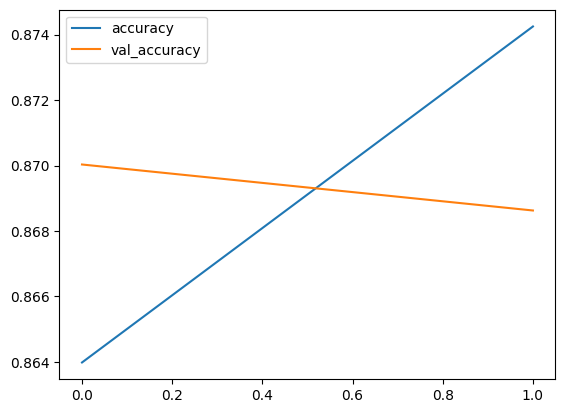

In [ ]:
losse3[['accuracy','val_accuracy']].plot()

<Axes: >

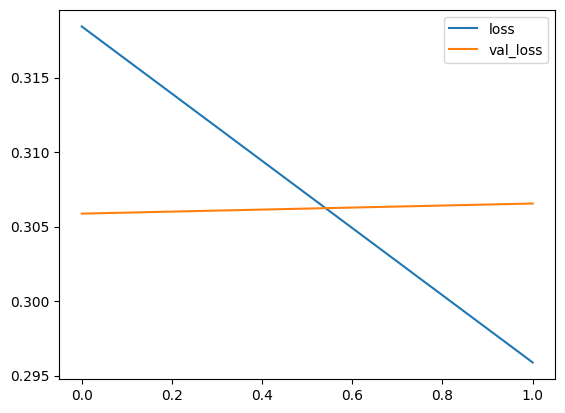

In [ ]:
losse3[['loss','val_loss']].plot()

# MobileNet Model Summary:

The model appears to be training effectively with improvements in both training and validation metrics. MobileNet Model seems to perform better and more stable than the other two models with a steady accuracy performance of 88%. The model took quite sometime to run the first two epochs so we had to stop it. Overally the model performed really well.

# Model Deployment

In [ ]:
#Installing streamlit

!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
import streamlit as st
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Define your model architecture - ensure it matches the saved model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define layers here - ensure they match those in your saved model
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        # Use a dummy input to calculate the size after convolutions and pooling
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(nn.functional.relu(self.conv1(dummy_input)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the model and ensure its architecture matches the one trained
model = MyModel()
model.load_state_dict(torch.load('/content/drive/My Drive/path_to_save_model/best_model.pth'))
model.eval()

# Define a transform to preprocess the input images
transform = transforms.Compose([
    transforms.Resize((50, 50)),  # Resize images to match the input size during training
    transforms.ToTensor()          # Convert images to tensor format
])

# Streamlit app setup
st.title('Breast Cancer Histopathology Image Classification')

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("Classifying...")

    # Transform and add batch dimension
    image = transform(image)
    image = image.unsqueeze(0)

    # Predict
    output = model(image)
    _, predicted = torch.max(output, 1)

    # Convert numerical prediction to class label
    class_labels = {0: 'Non-IDC', 1: 'IDC'}
    predicted_class = class_labels[predicted.item()]

    st.write(f'Predicted class: {predicted_class}')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/path_to_save_model/best_model.pth'

In [ ]:
#Steamlit
import streamlit as st
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Define your model architecture - use the same architecture as the one you trained and saved
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define layers here - make sure these match the saved model
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(F.relu(self.conv1(dummy_input)))
        x = self.pool(F.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the model
model = MyModel()
model.load_state_dict(torch.load('best_model.pth')) # Now the model architecture should match
model.eval()

# Define a transform
transform = transforms.Compose([
    transforms.Resize((50, 50)), # Adjust the size if needed to match your training data
    transforms.ToTensor()
])

# Streamlit app
st.title('Model Deployment with Streamlit')

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    image = transform(image)
    image = image.unsqueeze(0)  # Add batch dimension
    output = model(image)
    _, predicted = torch.max(output, 1)
    st.write(f'Predicted class: {predicted.item()}')

2024-08-06 15:40:30.428 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [55]:
import streamlit as st
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image

# Define your model architecture - ensure it matches the saved model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define layers here - ensure they match those in your saved model
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.flattened_size = self._get_flattened_size()
        self.fc1 = nn.Linear(self.flattened_size, 128)
        self.fc2 = nn.Linear(128, 2)

    def _get_flattened_size(self):
        # Use a dummy input to calculate the size after convolutions and pooling
        dummy_input = torch.zeros(1, 3, 50, 50)
        x = self.pool(nn.functional.relu(self.conv1(dummy_input)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        return x.numel()

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, self.flattened_size)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the model and ensure its architecture matches the one trained
model = MyModel()
model.load_state_dict(torch.load('best_model.pth'))
model.eval()

# Define a transform to preprocess the input images
transform = transforms.Compose([
    transforms.Resize((50, 50)),  # Resize images to match the input size during training
    transforms.ToTensor()          # Convert images to tensor format
])

# Streamlit app setup
st.title('Breast Cancer Histopathology Image Classification')

uploaded_file = st.file_uploader("Choose an image...", type="jpg")

if uploaded_file is not None:
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image.', use_column_width=True)
    st.write("Classifying...")

    # Transform and add batch dimension
    image = transform(image)
    image = image.unsqueeze(0)

    # Predict
    output = model(image)
    _, predicted = torch.max(output, 1)

    # Convert numerical prediction to class label
    class_labels = {0: 'Non-IDC', 1: 'IDC'}
    predicted_class = class_labels[predicted.item()]

    st.write(f'Predicted class: {predicted_class}')

Save the pretrained model

In [ ]:
# Correct file extension for saving
MobileNetmodel.save('saved_model/mobilenet_model.keras')

In [ ]:
# Define the directory path
save_dir = '/home/foyucho/saved_model/mobilenet_model'

# Create the directory if it does not exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
MobileNetmodel.save(save_dir + '/mobilenet_model.keras')


Convert the model to Saved_Model format which is used for deployment

In [ ]:
os.makedirs('saved_model', exist_ok=True)
MobileNetmodel.save('saved_model/mobilenet_model.keras')

**MODEL EVALUATION**

The best performing model was the **simple CNN** with an **accuracy of 90.32%, sensitivity of 80.5% and specificity of 94.19% percent.**

The performance of the model was satisfactory for the targets set and is **fairly robust** with a good balance between general accuracy and the ability to correctly identify both positive and negative cases.

1. **Accuracy (90.32%)**: This is a strong metric, suggesting that the model correctly identifies the presence or absence of breast cancer in over 90% of cases. High accuracy is crucial for building confidence in the model's predictions.

2. **Sensitivity (80.5%)**: i.e. the true positive rate, this metric indicates that the model correctly identifies 80.5% of actual positives (i.e., histopathology slides that do show breast cancer). While this is relatively high, there's room for improvement, especially since higher sensitivity is critical in medical diagnostics to ensure cases are not missed.

3. **Specificity (94.19%)**: This indicates that the model correctly identifies 94.19% of negatives (i.e., slides that do not show breast cancer). High specificity is essential to minimize false positives, which can reduce unnecessary additional testing and anxiety for patients.


The other models also performed fairly well with accuracies of high 80s but could not run for more epochs due to them being **too computationally expensive**.



## **RECOMMENDATIONS**

**Utility**: This model can be further improved; particularly when it comes to sensitivity. This can involve running more robust models on more powerful computers.

**Validation**: Before real world deployment, a validation phase in a clinical setting through a clinical trial is necessary where the model’s predictions are compared against traditional diagnostic outcomes. This helps build trust in the tool and can uncover any specific conditions or cases where the model may underperform.

**Regulatory approval**: The model must undergo rigorous validation and certification to meet accuracy, reliability, and safety standards i.e. approval by FDA & other regulatory authorities. Comprehensive clinical trials comparing the model's performance against existing diagnostic methods are necessary, and adherence to data protection laws such as HIPAA is mandatory. Continuous monitoring and transparent reporting of the model's performance are required post-approval to ensure ongoing compliance and safety. Moreover, the model may need adjustments to meet diverse international regulatory standards if intended for global use, making documentation and transparency in its development and operation critical to navigating the regulatory landscape successfully.

**Practical Integration into Routine Clinical Workflow**: More groundwork need to be done in order to figure out the integration of the model into the standard diagnostic workflow of pathologists. This could involve using the model as a preliminary screening tool to prioritize cases or to double-check diagnoses, potentially streamlining workflows and reducing fatigue-related errors.

# **CONCLUSION**

From a medical diagnosis perspective, the image classification model for breast cancer histopathology demonstrates **a high level of utility for pathologists**. With an accuracy of 90.32%, the model can serve as a reliable aid in the initial screening or review of histopathological slides, potentially reducing the workload on specialists and speeding up the diagnostic process. The specificity of 94.19% is particularly noteworthy, as it minimizes the risk of false positives, which are crucial in avoiding unnecessary interventions and anxiety for patients. However, the sensitivity of 80.5%, while relatively high, suggests that there is still a risk of missing some true positive cases of breast cancer. Enhancements in sensitivity would make the model even more valuable, ensuring that fewer cases go undetected. In its current state, the model can be an effective tool for assisting pathologists in making more accurate and efficient diagnoses, **provided it is used in conjunction with expert human assessment.**



